In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rutherford's Scattering Model

In 1909, Ernest Rutherford and his team set out to explore the atom's structure, challenging the widely accepted plum pudding model. To do this, they fired alpha particles at a thin sheet of gold foil and observed what happened. Most of the particles passed right through, suggesting atoms are mostly empty space. But what really surprised them was that some particles bounced off at small angles, and a few even came straight back. This told them something was going on inside the atom — it had to have a small, dense, positively charged core at the center. From this, Rutherford concluded that the atom must have a nucleus, and that electrons orbit around it.

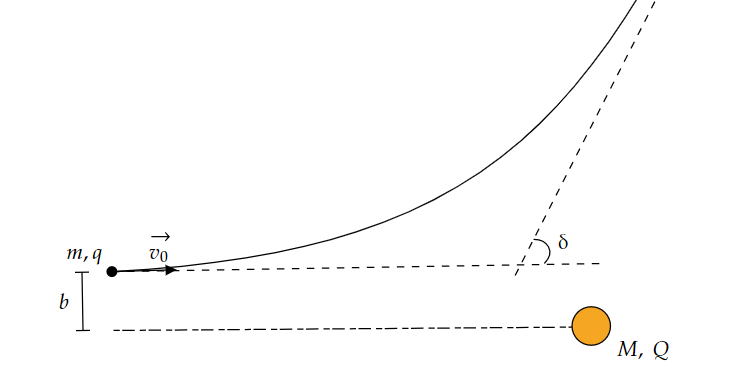

Most interactions of the form above are termed as 'rutherford scattering models' probably because it reminds us of the gold foil experiment. In the model, there consists of a light projectile of mass m shot straight towards a heavy center of mass M that is immovable or held fixed (hence, linear momentum of the system is <b>not</b> conserved)

The heavy center has a central potential that provides a repulsive central force to the projectile that pushes it away.

- b is the impact parameter. It tells us the "height" at which the projectile is shot towards the center
- $\vec{v_0}$ is the initial velocity vector
- $\delta$ is the scattering angle

if we consider the projectile as a particle of charge q and the center as the nucleus then the force between them would be 
$$ \vec{F} = \frac{1}{4\pi\epsilon_0} \frac{q\cdot Ze}{r^2} \hat{r}$$

- charge on the projectile is $q$
- $Z$ is the atomic number of the nucleus
- $r$ is the distance between the nucleus and the projectile as function of time
- the force is always along the direction of the line joining them, i.e $\hat{r}$

While it may be easier if we use polar coordinates, let's use cartesian just for the sake of it. (it's easier for the computer)
The force can be broken to x and y components

- $F_x \hat{x} = ma_x \hat{x} = \frac{1}{4\pi\epsilon_0} \frac{q\cdot Ze x}{(x^2 + y^2)^{3/2}} \hat{x}$
- $F_y \hat{y} = ma_y \hat{y} = \frac{1}{4\pi\epsilon_0} \frac{q\cdot Ze y}{(x^2 + y^2)^{3/2}} \hat{y}$

Using these equations, we can use euler's method.

## Euler's method

Euler's method, in the context of physics, is essentially an imitation of what happens in the real word. No object knows what it is supposed to do and what trajectory
it is supposed to take. instead, it only responds to the forces acting on it. The force produces acceleration and acceleration being the second derivative of position ultimately tells how the position must change. The idea of calculus is that, all these variables that are functions of time are essentially constant within a tiny time interval of dt and we sum these changes.

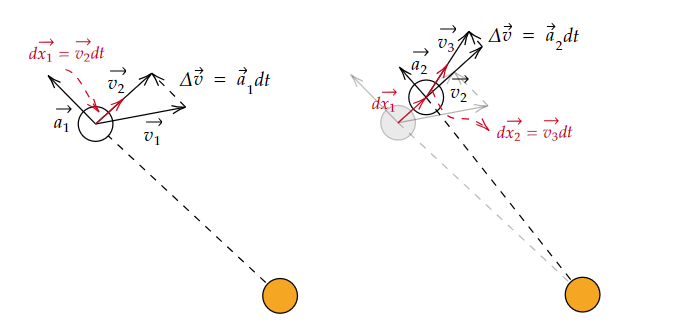

The picture above is complicated a bit but if you look carefully, the following steps are followed. 
- the particle feels a force from the center and is provided with acceleration $\vec{a_1}$
- the particle's velocity increases by $\vec{a_1}dt$
- the new velocity is $\vec{v_2}$
- the partcile moves $\vec{v_2}dt$

this happens in the first time interval dt. When the next dt starts,
- the particle is at a new location, slightly nudged. it feels a new force which provides acceleration $\vec{a_2}$
- velocity increases by $\vec{a_2}dt$; new velocity is $\vec{v_3}$
- particle shifts by $\vec{v_3}dt$

A computer when told to perform euler's method does the same thing but considers a finite size for dt instead of the infinitesimal dt simply bcos we can only finitely small things

The following code to plot the trajectory of the projectile is basic and a simple reading should suffice to see how it works

In [2]:
#initial conditions
K = 2.3e2
q1 = 79
q2 = 2
m = 4 #units: amu
Q = q1*q2/m
t=20
dt = 10**(-5)
x = [-15]
y = [3] #impact parameter b
a = [[K*Q*x[0]/(x[0]**2+y[0]**2)**(3/2),K*Q*y[0]/(x[0]**2+y[0]**2)**(3/2)]]
v = [[200,0]]

These control the set up and the initial conditions of the system. The code below is euler's method

In [3]:
for i in range(0,int(t/dt)):
    
    v_x = a[i][0]*dt + v[i][0]
    v_y = a[i][1]*dt + v[i][1]
    v.append([v_x,v_y])
    
    x.append(v[i][0]*dt+x[i])
    y.append(v[i][1]*dt+y[i])
    
    a_x = K*Q*x[i]/(x[i]**2+y[i]**2)**(3/2)
    a_y = K*Q*y[i]/(x[i]**2+y[i]**2)**(3/2)
    a.append([a_x,a_y])

that is all. If you would like to see the trajectory of the projectile being deflected by the nucleus, you can plot x and y coordinates

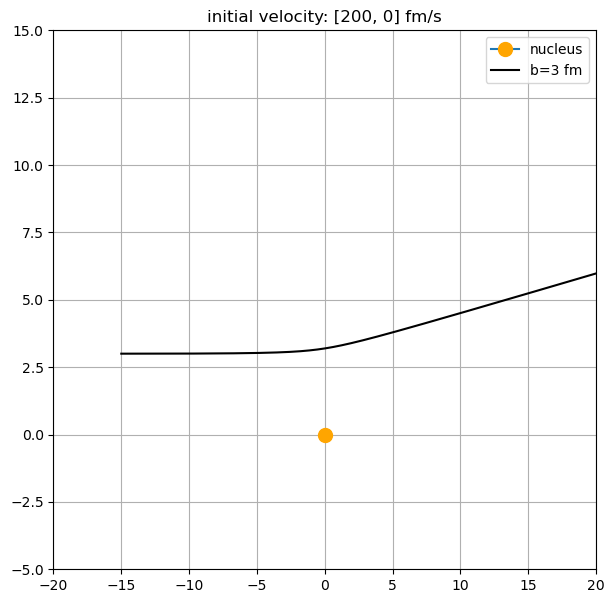

In [4]:
X = np.array(x)
Y = np.array(y)

plt.figure(figsize=(7,7))
plt.title("initial velocity: {} fm/s".format(v[0]))
plt.plot(0,0,marker = 'o', ms = 10, mec= 'orange', mfc= "orange")
plt.plot(x,y, color="black")
plt.xlim(-20,20)
plt.ylim(-5,15)
plt.grid("true")
plt.legend(["nucleus","b={} fm".format(y[0])])

We can vary the parameters and see other situations. For example, close to the nucleus or a very low impact parameter, the particle could deflect back to return

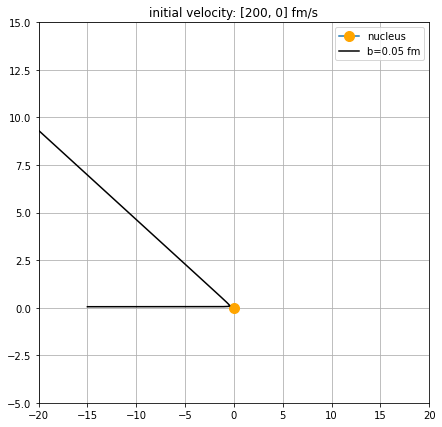

and of course if you lower the velocity of the projectile, the more it deflects as it has less momentum. For the same impact parameter as previously(3 fm) let's lower the velocity to 100 m/s

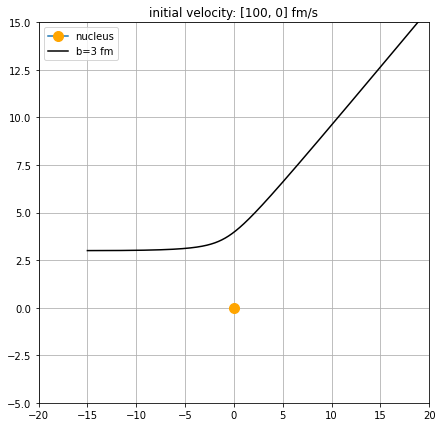

it deflected more than when it was 200 m/s. Let's try 50 m/s

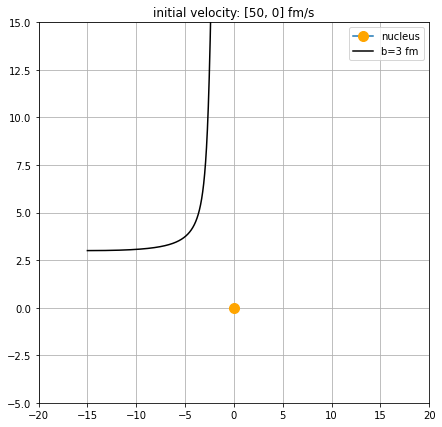

We can measure the scattering angle by calculating the slope of the asymptote of the trajectory and takingthe tangent inverse of it. 

In [5]:
def ScatAngle(x,y,u='rad'):
    Ang = np.arctan((y[len(y)-1]-y[len(y)-2])/(x[len(x)-1]-x[len(x)-2]))
    if Ang>0:
        degAng = (180/np.pi)*Ang
    else:
        degAng = 180 + (180/np.pi)*Ang
        
    print("{} in radians. {} in degrees".format(Ang,degAng))
        
    if u == 'rad':
        return Ang
    if u == 'deg':
        return degAng
    else:
        ScatAngle(x, y)

For a particle of initial velocity 200 m/s and impact parameter 3fm the scattering angle is

In [7]:
ScatAngle(x,y)

0.14750605473587458 in radians. 8.451474388991322 in degrees


0.14750605473587458